<a href="https://colab.research.google.com/github/dzulwulann/CustomerPersonality_Prediction/blob/main/Marketing_campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [3]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Importing Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/MyDrive/RAKAMIN/Predict Customer Personality to boost marketing campaign/marketing_campaign_data.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [ ]:
data.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### Calculating Converstion Rate

In [7]:
#calculating total customer
total_customer = data.shape[0]

In [8]:
#calcualting respons customer
total_conversions = data[data['Response']==1].shape[0]

In [9]:
#converstion rate
conversion_rate = (total_conversions/total_customer)*100

print(f"Conversion Rate: {conversion_rate:.2f}%")

Conversion Rate: 14.91%


From the data we calculated the conversion rate is **14.91%**

# Age vs Conversion Rate

In [10]:
#transform year_birth to age
data['age'] = 2024 - data['Year_Birth']

In [11]:
data['age'].describe()

count    2240.000000
mean       55.194196
std        11.984069
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max       131.000000
Name: age, dtype: float64

In [12]:
conditions = [
    data['age'] < 40,
    (data['age'] >= 40) & (data['age'] < 65),
    data['age'] >=65
]

# Define the corresponding labels for each group
labels = ['Young Adult', 'middle-aged', 'Elder']

In [13]:
# Create the age group column
data['age_group'] = np.select(conditions, labels, default='Other')

In [14]:
conversion_rates = data.groupby('age_group')['Response'].mean() * 100

In [45]:
data['age_group'].isnull().sum()

0

In [15]:
conversion_rates = conversion_rates.reset_index()
conversion_rates

,age_group,Response
0,Elder,14.912281
1,Young Adult,16.289593
2,middle-aged,14.699793


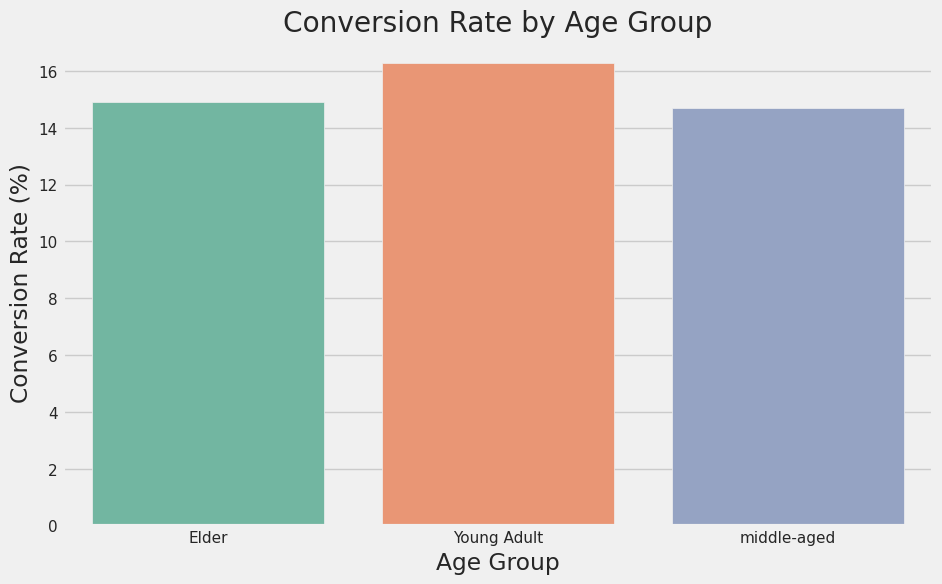

In [16]:
#plotting conversion rate by age group
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='Response', data=conversion_rates, palette='Set2')
plt.title('Conversion Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Conversion Rate (%)')
plt.show()

From the chart, it's clear that the 'Young Adult' group boasts the highest conversion rate. This indicates that customers under 40 years old are significantly more responsive to our campaign efforts compared to other age groups.

## Income vs Response

We want to see how the income give effect to the marketing response

In [17]:
#Filtering the data
data_response = data[data['Response']==1]

In [18]:
data['Income'].describe()

count    2.216000e+03
mean     5.224725e+07
std      2.517308e+07
min      1.730000e+06
25%      3.530300e+07
50%      5.138150e+07
75%      6.852200e+07
max      6.666660e+08
Name: Income, dtype: float64

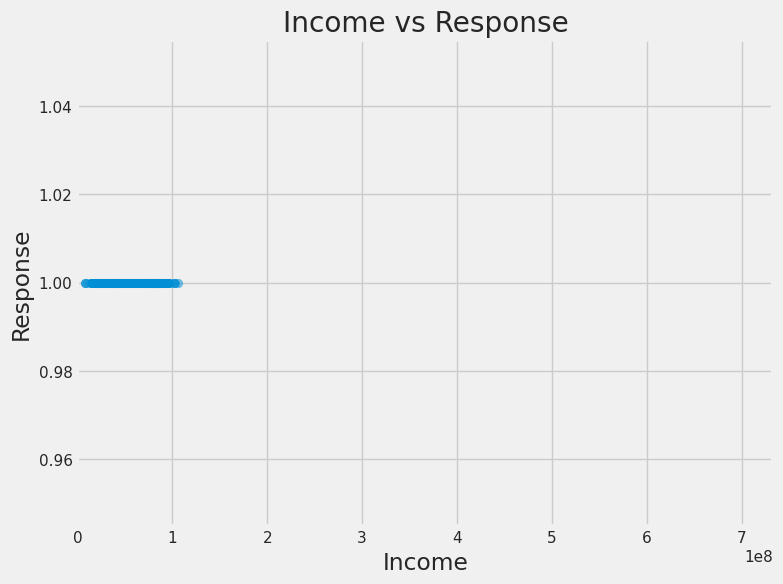

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(data_response['Income'], data_response['Response'], alpha=0.5)
plt.title('Income vs Response')
plt.xlabel('Income')
plt.ylabel('Response')
plt.xlim(0, max(data['Income']) * 1.1)
plt.grid(True)
plt.show()

Interestingly, the scatter plot reveals a compelling trend: individuals with an income **below 100 million** demonstrate a notably **higher responsiveness** to our campaign initiatives. This insightful observation underscores the potential effectiveness of targeting this demographic, offering valuable strategic insights for optimizing future marketing endeavors.

# Data Preprocessing

In [20]:
#check missing value for each column
data.isnull().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
age                     0
age_group               0
dtype: int64

Identifying **24 missing values** within the **'Income'** feature, we aim to address this gap by imputing the mean income value. This approach ensures a comprehensive dataset for analysis, allowing for more robust insights into customer behavior and campaign effectiveness

In [21]:
data_new = data

In [22]:
#Fill value null with mean of the income data
data_new['Income'] = data_new['Income'].fillna(data_new['Income'].mean())

In [23]:
#remove column ID
data_new = data.drop(columns='ID')

In [24]:
duplicate_rows = data_new.duplicated()

# To get the actual duplicate rows, you can use boolean indexing
duplicate_rows_df = data_new[duplicate_rows]

# To count the number of duplicate rows
num_duplicates = duplicate_rows.sum()
print(num_duplicates)

0


In [25]:
cats_types = ['object']
nums_types = ['int64', 'float64']
nums = data_new.select_dtypes(include = nums_types)
cats = data_new.select_dtypes(include = cats_types)

In [26]:
numericals = nums.columns

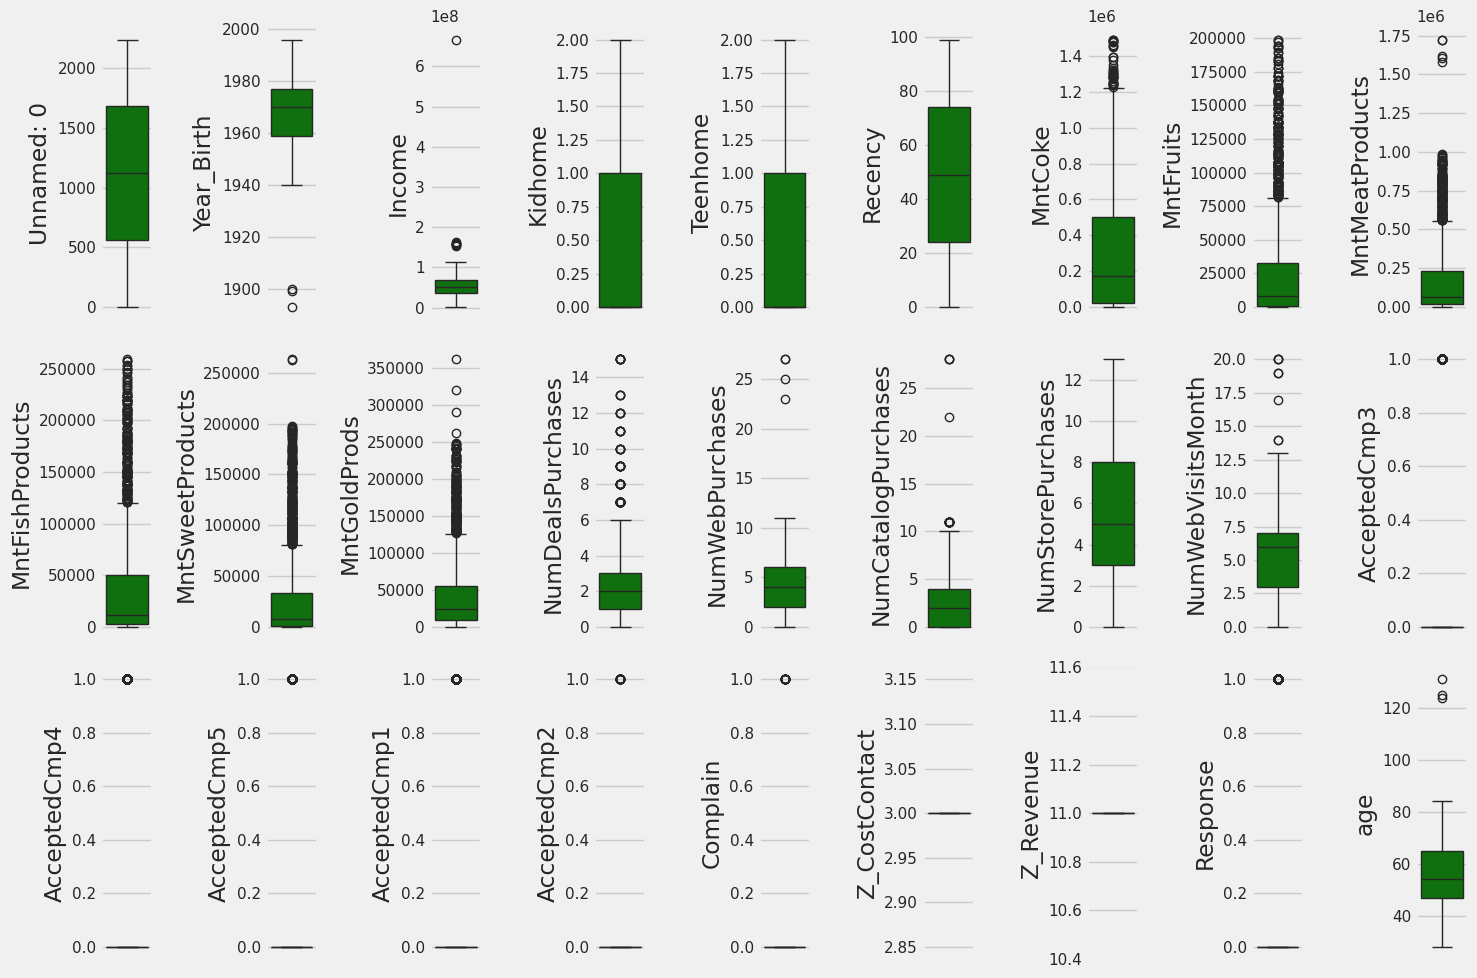

In [27]:
features = numericals

# Calculate the number of rows and columns needed for subplots
num_rows = 3
num_cols = len(features) // num_rows + (len(features) % num_rows > 0)

plt.figure(figsize=(15, 10))

for i in range(len(features)):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(y=data[features[i]], color='green', orient='v')
    plt.tight_layout()

plt.show()

From the plot above, We identify there are outlier in some columns, such as **Income, MntCoke, MntFruit, MntMeatProducts, MntFishProduct,MntGoldProducts,NumDealsPurchases,NumbWebPurchases,NumCatalogPurchases,NumbWebVisitMonth and Age**. Considering the number of outliers that exist from the columns we've mentioned. We decide to only remove outliers from column **Income, Age, NumDealsPurchases, NumCatalogPurchases, and NumbWebVisitsMonth**.

In [28]:
data2 = data_new

In [29]:
# Removing outliers using Z-Score
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier {len(data2)}')


for col in ['Income','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumWebVisitsMonth']:
    zscore = np.abs(stats.zscore(data2[col]))
    filtered_entries = (zscore < 3)

data2 = data2[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(data2)}')

Jumlah baris sebelum memfilter outlier 2240
Jumlah baris setelah memfilter outlier: 2231


In [50]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 0 to 2214
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  2231 non-null   float64
 1   Year_Birth                  2231 non-null   float64
 2   Education                   2231 non-null   object 
 3   Marital_Status              2231 non-null   object 
 4   Income                      2231 non-null   float64
 5   Kidhome                     2231 non-null   float64
 6   Teenhome                    2231 non-null   float64
 7   Recency                     2231 non-null   float64
 8   MntCoke                     2231 non-null   float64
 9   MntFruits                   2231 non-null   float64
 10  MntMeatProducts             2231 non-null   float64
 11  MntFishProducts             2231 non-null   float64
 12  MntSweetProducts            2231 non-null   float64
 13  MntGoldProds                2231 non-n

In [30]:
#remove dt_customer
data2 = data2.drop(columns='Dt_Customer')

In [31]:
cats.columns

Index(['Education', 'Marital_Status', 'Dt_Customer', 'age_group'], dtype='object')

In [32]:
#check number of type education
data2['Education'].value_counts()

Education
S1     1122
S3      483
S2      369
D3      203
SMA      54
Name: count, dtype: int64

In [33]:
from sklearn.preprocessing import OrdinalEncoder

In [34]:
#reshape the data to arrya 2d
education_data = np.array(data2['Education']).reshape(-1, 1)
education_encoder = OrdinalEncoder(categories=[['SMA', 'D3', 'S1','S2','S3']]) #

encoded_education = education_encoder.fit_transform(education_data)
print(encoded_education)

[[2.]
 [2.]
 [2.]
 ...
 [2.]
 [3.]
 [4.]]


In [35]:
#Merge the encoded data to train data
data2['Encoded_education'] = encoded_education

In [36]:
from sklearn.preprocessing import OneHotEncoder

In [37]:
#check number of type Marital_status
data2['Marital_Status'].value_counts()

Marital_Status
Menikah        862
Bertunangan    578
Lajang         481
Cerai          230
Janda           77
Duda             3
Name: count, dtype: int64

In [38]:
onehot_encoder = OneHotEncoder()
marital_status_data = np.array(data2['Marital_Status']).reshape(-1, 1)
encoded_data = onehot_encoder.fit_transform(marital_status_data)
encoded_ms = pd.DataFrame(encoded_data.toarray(), columns=onehot_encoder.get_feature_names_out(['Marital_Status']))
data2 = pd.concat([data2, encoded_ms], axis=1)

In [39]:
data2['age_group'].value_counts()

age_group
middle-aged    1443
Elder           568
Young Adult     220
Name: count, dtype: int64

In [60]:
data2['age_group'].isnull().sum()

9

In [62]:
data2 = data2.dropna()

In [63]:
#reshape the data to arrya 2d
age_group_data = np.array(data2['age_group']).reshape(-1, 1)
age_group_encoder = OrdinalEncoder(categories=[['Young Adult','middle-aged','Elder']]) #ordering the ordinal data

encoded_age_group = age_group_encoder.fit_transform(age_group_data)
print(encoded_age_group)

[[2.]
 [2.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [64]:
data2['Encoded_age_group'] = encoded_age_group

In [65]:
data2.head()

,Unnamed: 0,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,age_group,Encoded_education,Marital_Status_Bertunangan,Marital_Status_Cerai,Marital_Status_Duda,Marital_Status_Janda,Marital_Status_Lajang,Marital_Status_Menikah,Encoded_age_group
0,0.0,1957.0,S1,Lajang,58138000.0,0.0,0.0,58.0,635000.0,88000.0,546000.0,172000.0,88000.0,88000.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1.0,67.0,Elder,2.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
1,1.0,1954.0,S1,Lajang,46344000.0,1.0,1.0,38.0,11000.0,1000.0,6000.0,2000.0,1000.0,6000.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,70.0,Elder,2.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
2,2.0,1965.0,S1,Bertunangan,71613000.0,0.0,0.0,26.0,426000.0,49000.0,127000.0,111000.0,21000.0,42000.0,1.0,8.0,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,59.0,middle-aged,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.0,1984.0,S1,Bertunangan,26646000.0,1.0,0.0,26.0,11000.0,4000.0,20000.0,10000.0,3000.0,5000.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,40.0,middle-aged,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4.0,1981.0,S3,Menikah,58293000.0,1.0,0.0,94.0,173000.0,43000.0,118000.0,46000.0,27000.0,15000.0,5.0,5.0,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,43.0,middle-aged,4.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [68]:
#filtering feature
#data_x = data2[['Income','Kidhome','Teenhome','Recency','MntCoke','MntFruits','MntMeatProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth',]]

data_x = data2.drop(columns= ['Education', 'Marital_Status', 'age_group'])

In [69]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

numerical_features = data_x.columns.to_list()
for n in numerical_features:
  scaler = ss.fit(data_x[[n]])
  data_x[n] = scaler.transform(data_x[[n]])

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(data_x, test_size=0.3, random_state=42)